Importing th dependencies

In [143]:
import  pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
import numpy as np
from sklearn.neighbors import KNeighborsRegressor



data collection and processing

In [144]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv('car data.csv')


In [145]:
# inspecting the first five rows of the dataframe
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


describe the dataset

In [146]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


check values

Encoding categorical data

In [147]:

Age = []
for i in car_dataset['Year']:
    Age.append(2023-i)
car_dataset.insert(2, 'Age', Age)
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace(fuel_type_mapping)

# Encoding seller type
seller_type_mapping = {'Dealer': 0, 'Individual': 1}
car_dataset['Seller_Type'] = car_dataset['Seller_Type'].replace(seller_type_mapping)

# Encoding transmission
transmission_mapping = {'Manual': 0, 'Automatic': 1}
car_dataset['Transmission'] = car_dataset['Transmission'].replace(transmission_mapping)

# Displaying the first few rows of the updated dataset
print(car_dataset.head())

  Car_Name  Year  Age  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014    9           3.35           5.59       27000          0   
1      sx4  2013   10           4.75           9.54       43000          1   
2     ciaz  2017    6           7.25           9.85        6900          0   
3  wagon r  2011   12           2.85           4.15        5200          0   
4    swift  2014    9           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


In [148]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Age            301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    int64  
 7   Seller_Type    301 non-null    int64  
 8   Transmission   301 non-null    int64  
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 23.6+ KB


Splitting the data and target 

In [149]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [150]:
print(x.head())

   Year  Age  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014    9           5.59       27000          0            0             0   
1  2013   10           9.54       43000          1            0             0   
2  2017    6           9.85        6900          0            0             0   
3  2011   12           4.15        5200          0            0             0   
4  2014    9           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


split car_data set to training and testing sets

In [151]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Train our model in linear regression 

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [153]:
from sklearn.linear_model import Ridge  # Using Ridge regression for regularization

# Set hyperparameters
alpha = 1.0  # Regularization strength (you can adjust this value)

# Initialize Ridge regression model with hyperparameters
lin_reg_mod = Ridge(alpha=alpha)
lin_reg_mod.fit(X_train, y_train)

Ridge()

our model evaluation for training data

In [154]:
training_data_prediction=lin_reg_mod.predict(X_train)
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.8839653291886209


Visualize our model 

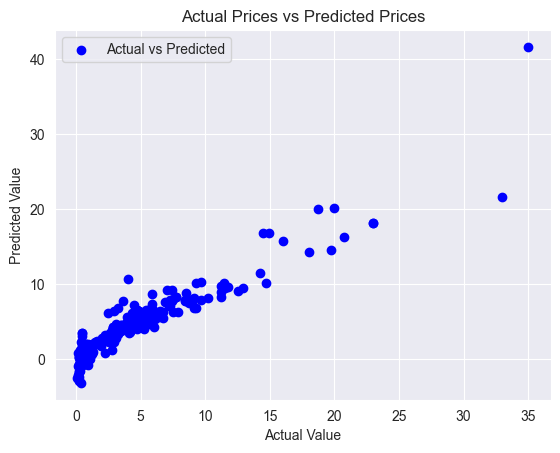

In [155]:

# Scatter plot with different colors for actual and predicted values
plt.scatter(y_train, training_data_prediction, c='blue', label='Actual vs Predicted')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


our model evaluation for test data

In [156]:
test_data_prediction=lin_reg_mod.predict(X_test)
error_score=metrics.r2_score(y_test,test_data_prediction)

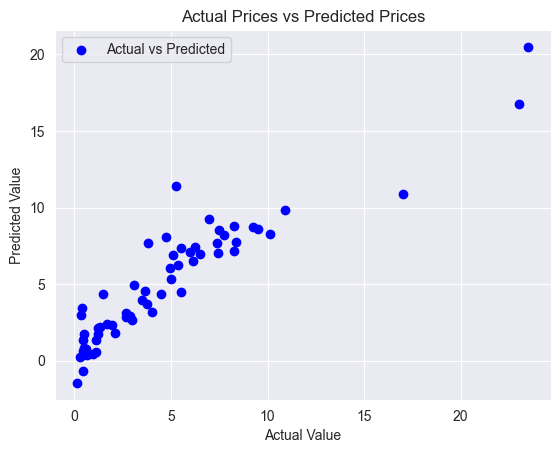

In [157]:

# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, test_data_prediction, c='blue', label='Actual vs Predicted')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [158]:
#the average of the absolute differences between the predicted values and the actual values.
print("MAE:",metrics.mean_absolute_error(y_test,test_data_prediction))
#average of the squared differences between the predicted values and the actual values.
print("MSE:",metrics.mean_squared_error(y_test,test_data_prediction))
#the square root of the MSE. It is often used for easier interpretation, as it is in the same units as the dependent variable.
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,test_data_prediction)))
print('R squared error : ',error_score)


MAE: 1.2227048910739935
MSE: 3.5379547821211768
RMSE: 1.8809451831781745
R squared error :  0.8464135008597299


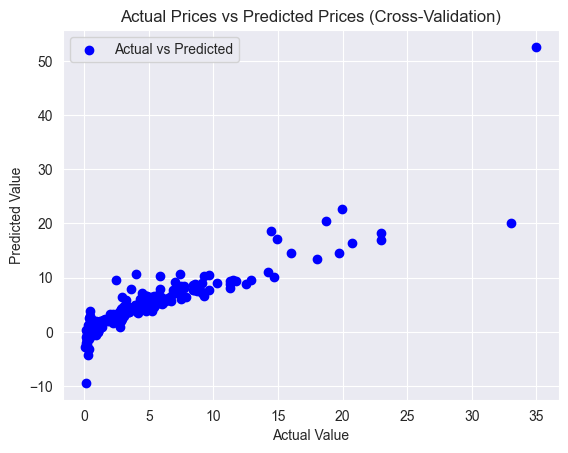

Cross-validated R squared scores: [0.84092173 0.76522049 0.80361319 0.74644891 0.87615945]
Mean R squared score: 0.8064727551786758


In [159]:


# Assuming you already have X_train and y_train

# Initialize linear regression model


# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
predicted = cross_val_predict(lin_reg_mod, X_train, y_train, cv=kfold)

# Scatter plot with different colors for actual and predicted values
plt.scatter(y_train, predicted, c='blue', label='Actual vs Predicted')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Prices vs Predicted Prices (Cross-Validation)')
plt.legend()
plt.show()

# Evaluate cross-validated R squared scores
results = cross_val_score(lin_reg_mod, X_train, y_train, cv=kfold)
print("Cross-validated R squared scores:", results)
print("Mean R squared score:", np.mean(results))


In [160]:
regressor=KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [161]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test is the actual target values for your test set
# If you have a regression problem, you might use metrics like Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5807358688524593
R-squared: 0.9313785214583935
